In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import string
import re
from typing import List
from collections import Counter
from tqdm import tqdm
from pyod.models.copod import COPOD
%matplotlib inline
pd.set_option('display.max_columns', None)

#### Util functions

In [2]:
def read_word_list(file_name:str):
    result = []
    with open(file_name) as fp:
        result.extend([word.strip() for word in fp.readlines()])
    return result

#### Letter frequencies

In [3]:
# Create a list of each letter in the alphabet
ALPHABET = list(string.ascii_lowercase)
ALPHABET

['a',
 'b',
 'c',
 'd',
 'e',
 'f',
 'g',
 'h',
 'i',
 'j',
 'k',
 'l',
 'm',
 'n',
 'o',
 'p',
 'q',
 'r',
 's',
 't',
 'u',
 'v',
 'w',
 'x',
 'y',
 'z']

In [5]:
# Read in word lists
possible_words_list = read_word_list("possible_answers.txt")
accepted_words_list = read_word_list("accepted_words.txt")


In [6]:
# Create a dictionary that counts the number of ooccurrences of
# each letter
words_string = ''.join(accepted_words_list)
letter_counts = dict(Counter(words_string))

# Create DataFrame containing the frequency of each letter in all words
letter_frequencies = {k:v/len(accepted_words_list) for k,v in letter_counts.items()}
letter_frequencies = pd.DataFrame({'Letter':list(letter_frequencies.keys()),
                                   'Frequency':list(letter_frequencies.values())}).sort_values('Frequency',
                                                                                               ascending=False)

letter_frequencies

,Letter,Frequency
12,s,0.513799
2,e,0.513568
0,a,0.461764
18,o,0.342121
6,r,0.320537
5,i,0.289778
4,l,0.259867
8,t,0.254009
16,n,0.227567
20,u,0.193571


Text(0.5, 1.0, 'Frequency of Letters in 5-Letter Words')

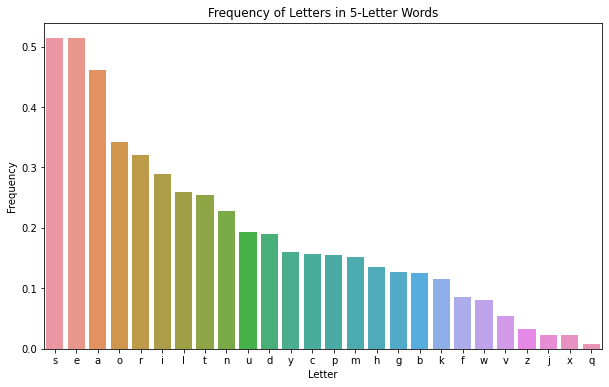

In [7]:
fig,ax = plt.subplots(figsize=(10,6))
sns.barplot(x='Letter', y='Frequency', data=letter_frequencies)
ax.set_title('Frequency of Letters in 5-Letter Words')

#### One-hot  encoded word data

In [8]:
letter_freq_cols = []
for letter in ALPHABET:
    for position in range(5):
        letter_freq_cols.append(f'{letter}{position}')
        

In [9]:
# Create letter/position occurrence matrix
letter_pos_freq = pd.DataFrame()

# For each word in the list of accepted words
for word in tqdm(accepted_words_list):
    
    # Convert the word to it letter-position format
    word_and_pos = ''.join([f"{letter}{pos}" for pos, letter in enumerate(word)])
    
    # Create letter-position counter dictionary
    letter_pos_counter = {}
    for wp in letter_freq_cols:
        letter_pos_counter[wp] = len(re.findall(wp, word_and_pos))

    tmp_pos_freq = pd.DataFrame(letter_pos_counter, index=[word])
    letter_pos_freq = pd.concat([letter_pos_freq, tmp_pos_freq])
    
letter_pos_freq.head()

100%|████████████████████████████████████| 12972/12972 [01:21<00:00, 159.82it/s]


,a0,a1,a2,a3,a4,b0,b1,b2,b3,b4,c0,c1,c2,c3,c4,d0,d1,d2,d3,d4,e0,e1,e2,e3,e4,f0,f1,f2,f3,f4,g0,g1,g2,g3,g4,h0,h1,h2,h3,h4,i0,i1,i2,i3,i4,j0,j1,j2,j3,j4,k0,k1,k2,k3,k4,l0,l1,l2,l3,l4,m0,m1,m2,m3,m4,n0,n1,n2,n3,n4,o0,o1,o2,o3,o4,p0,p1,p2,p3,p4,q0,q1,q2,q3,q4,r0,r1,r2,r3,r4,s0,s1,s2,s3,s4,t0,t1,t2,t3,t4,u0,u1,u2,u3,u4,v0,v1,v2,v3,v4,w0,w1,w2,w3,w4,x0,x1,x2,x3,x4,y0,y1,y2,y3,y4,z0,z1,z2,z3,z4
aahed,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
aalii,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
aargh,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
aarti,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
abaca,1,0,1,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [18]:
letter_pos_freq

,a0,a1,a2,a3,a4,b0,b1,b2,b3,b4,c0,c1,c2,c3,c4,d0,d1,d2,d3,d4,e0,e1,e2,e3,e4,f0,f1,f2,f3,f4,g0,g1,g2,g3,g4,h0,h1,h2,h3,h4,i0,i1,i2,i3,i4,j0,j1,j2,j3,k0,k1,k2,k3,k4,l0,l1,l2,l3,l4,m0,m1,m2,m3,m4,n0,n1,n2,n3,n4,o0,o1,o2,o3,o4,p0,p1,p2,p3,p4,q0,q1,q2,r0,r1,r2,r3,r4,s0,s1,s2,s3,s4,t0,t1,t2,t3,t4,u0,u1,u2,u3,u4,v0,v1,v2,v3,w0,w1,w2,w3,w4,x1,x2,x3,x4,y0,y1,y2,y3,y4,z0,z1,z2,z3,z4
aahed,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
aalii,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
aargh,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
aarti,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
abaca,1,0,1,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
zuzim,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
zygal,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
zygon,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
zymes,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0


In [22]:
letter_pos_freq_possible.query('o2==1 and o3==1').shape[0] / letter_pos_freq_possible.shape[0]

0.013390928725701945

In [10]:
# What's the probability that the first letter is 'a'?
print(letter_pos_freq['a0'].mean())

# What's the probability that 'a' is in the word?
print(len(letter_pos_freq.query('a0==1 or a1==1 or a2==1 or a3==1 or a4==1')) / len(letter_pos_freq))

# What's the probability that the second letter is 'h' given that the first letter is s?
print(letter_pos_freq.query('s0 == 1')['h1'].mean())

# What's the probability that the fourth letter is 'r' given that the first three letter are 's','h', and 'a'?
print(letter_pos_freq.query('s0 == 1 and h1 == 1 and a2 == 1')['r3'].mean())

0.05681467776749923
0.41088498304039467
0.09456869009584665
0.13157894736842105


In [11]:
letter_pos_freq_possible = letter_pos_freq[letter_pos_freq.index.isin(possible_words_list)]

# Drop columns with all zeros
for col in letter_pos_freq_possible.columns:
    
    if letter_pos_freq_possible[col].sum() == 0:
        letter_pos_freq_possible.drop(col, axis=1, inplace=True)
        letter_pos_freq.drop(col, axis=1, inplace=True)
        
letter_pos_freq_possible.head()

/Users/HarrisonHoffman/Desktop/DataScience/envs/baseprojects/lib/python3.9/site-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,a0,a1,a2,a3,a4,b0,b1,b2,b3,b4,c0,c1,c2,c3,c4,d0,d1,d2,d3,d4,e0,e1,e2,e3,e4,f0,f1,f2,f3,f4,g0,g1,g2,g3,g4,h0,h1,h2,h3,h4,i0,i1,i2,i3,i4,j0,j1,j2,j3,k0,k1,k2,k3,k4,l0,l1,l2,l3,l4,m0,m1,m2,m3,m4,n0,n1,n2,n3,n4,o0,o1,o2,o3,o4,p0,p1,p2,p3,p4,q0,q1,q2,r0,r1,r2,r3,r4,s0,s1,s2,s3,s4,t0,t1,t2,t3,t4,u0,u1,u2,u3,u4,v0,v1,v2,v3,w0,w1,w2,w3,w4,x1,x2,x3,x4,y0,y1,y2,y3,y4,z0,z1,z2,z3,z4
aback,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
abase,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
abate,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
abbey,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
abbot,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [28]:
[word for word in possible_words_list if (word[2]=='t') & ('r' in word) & ('a' in word) &('e' not in word)]

['actor', 'altar', 'artsy', 'ratio', 'ratty', 'satyr', 'ultra']

In [12]:
# Fit COPOD model
copod_model = COPOD(contamination=0.01)
copod_model.fit(letter_pos_freq_possible)

COPOD(contamination=0.01, n_jobs=1)

In [13]:
letter_pos_freq_possible['score'] = copod_model.decision_scores_
letter_pos_freq_possible.sort_values('score',inplace=True)

letter_pos_freq_possible['rank'] = range(1,len(letter_pos_freq_possible)+1)
letter_pos_freq_possible.head(30)[['score','rank']]

/var/folders/9r/y3yrm7yx2x31dxvgqt8pww3h0000gn/T/ipykernel_2716/4211978877.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  letter_pos_freq_possible['score'] = copod_model.decision_scores_
/Users/HarrisonHoffman/Desktop/DataScience/envs/baseprojects/lib/python3.9/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)
/var/folders/9r/y3yrm7yx2x31dxvgqt8pww3h0000gn/T/ipykernel_2716/4211978877.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usin

,score,rank
saint,13.084424,1
slate,13.089547,2
slice,13.150602,3
sooty,13.156166,4
crane,13.165940,5
sauce,13.213513,6
shale,13.277906,7
saute,13.305916,8
shine,13.310287,9
suite,13.324098,10


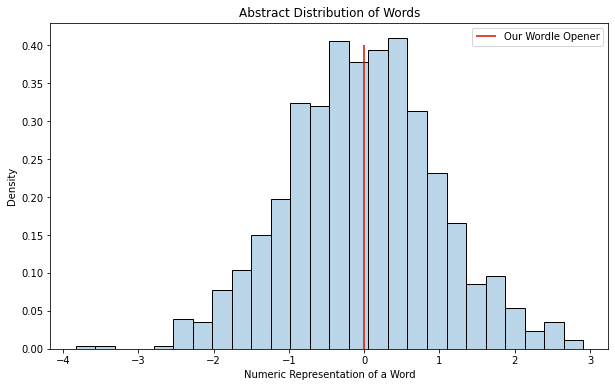

In [14]:
fig,ax = plt.subplots(figsize=(10,6))
sns.histplot(np.random.normal(size=1000), stat='density',alpha=0.3)
ax.vlines(x=0, ymin=0, ymax=0.4, color='#d90e00', label='Our Wordle Opener')
ax.set_xlabel('Numeric Representation of a Word')
ax.set_title('Abstract Distribution of Words')
ax.legend()

In [31]:
letter_pos_freq_possible.index[0]

'saint'